# Linear Regression

## In this notebook we will perform the following:
1. Load a dataset and perform basic data exploration using a powerful data science library called [pandas](https://pandas.pydata.org/pandas-docs/stable/).
1. Preprocess the data for linear regression.
1. Compute the cost and perform gradient descent in pure numpy in vectorized form.
1. Fit a linear regression model using a single feature.
1. Visualize our results using matplotlib.
1. Perform multivariate linear regression.
1. Pick the best features in the dataset.
1. Experiment with adaptive learning rates.

In [1]:
import numpy as np # used for scientific computing
import pandas as pd # used for data analysis and manipulation
import matplotlib.pyplot as plt # used for visualization and plotting
%matplotlib inline

np.random.seed(42) 

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## Part 1: Data Preprocessing

For the following exercise, we will use a dataset containing housing prices in King County, USA. The dataset contains 5,000 observations with 18 features and a single target value - the house price. 

In [13]:
# Read comma separated data
df = pd.read_csv('./data/housing_prices.csv')

### Data Exploration
A good practice in any data-oriented project is to first try and understand the data. Start by looking at the top of the dataset using the `df.head()` command. This will be the first indication that we read the data properly, and that the headers are correct. Next, we can use `df.describe()` to show statistics on the data and check for trends and irregularities.

In [14]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


In [15]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,5.000000e+03,5.000000e+03,5000.0000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,4.630823e+09,5.394699e+05,3.3714,2.062150,2061.036800,1.615893e+04,1.432600,0.009400,0.243000,3.455000,7.595200,1753.151000,1966.660800,95.052800,98078.812600,47.559312,-122.215864,1976.84520,13451.164600
std,2.870890e+09,3.873115e+05,0.9104,0.773592,923.727509,4.600220e+04,0.510793,0.096506,0.774643,0.677692,1.166537,818.390844,28.286855,425.234932,54.126332,0.139521,0.141807,674.73601,26514.749009
min,1.000102e+06,7.500000e+04,0.0000,0.000000,380.000000,6.090000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.00000,660.000000
25%,2.154075e+09,3.179062e+05,3.0000,1.500000,1410.000000,5.400000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1949.000000,0.000000,98033.000000,47.463675,-122.329000,1490.00000,5391.500000
50%,4.022900e+09,4.490000e+05,3.0000,2.000000,1890.000000,7.875000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,1968.000000,0.000000,98070.000000,47.572850,-122.235000,1820.00000,7800.000000
75%,7.345078e+09,6.500000e+05,4.0000,2.500000,2500.000000,1.123400e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2130.000000,1990.000000,0.000000,98118.000000,47.679200,-122.129000,2340.00000,10469.250000
max,9.842300e+09,7.060000e+06,9.0000,6.750000,10040.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7680.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.00000,434728.000000


We will start with one variable linear regression by extracting the target column and the `sqft_living` variable from the dataset. We use pandas and select both columns as separate variables and transform them into a numpy array.

In [16]:
X = df['sqft_living'].values
y = df['price'].values

# Preprocessing

As the number of features grows, calculating gradients gets computationally expensive. We can speed this up by normalizing the input data to ensure all values are within the same range. This is especially important for datasets with high standard deviations or differences in the ranges of the attributes.

In [17]:
def preprocess(X, y):
    """
    Perform mean normalization on the features and true labels.

    Input:
    - X: Inputs (n features over m instances).
    - y: True labels.

    Returns a two vales:
    - X: The mean normalized inputs.
    - y: The mean normalized labels.
    """
    X = np.asmatrix(X)
    y = np.asmatrix(y).T
    
    if X.shape[0] == 1: # Transpose the matrix if needed
        X = X.T
    
    mean_X = X.mean(0)
    mean_y = y.mean(0)

    min_X = X.min(0)
    min_y = y.min(0)

    max_X = X.max(0)
    max_y = y.max(0)

    X = (X - mean_X) / (max_X - min_X)
    y = (y - mean_y) / (max_y - min_y)

    return X, y

In [18]:
X, y = preprocess(X, y)

We will split the data into two datasets: 
1. The training dataset will contain 80% of the data and will always be used for model training.
2. The validation dataset will contain the remaining 20% of the data and will be used for model evaluation. For example, we will pick the best alpha and the best features using the validation dataset, while still training the model using the training dataset.

In [19]:
# training and validation split
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
X_train, X_val = X[idx_train], X[idx_val]
y_train, y_val = y[idx_train], y[idx_val]

## Data Visualization
Another useful tool is data visualization. Since this problem has only two parameters, it is possible to create a two-dimensional scatter plot to visualize the data. We will be using `matplotlib` for all data visualization purposes since it offers a wide range of visualization tools and is easy to use.

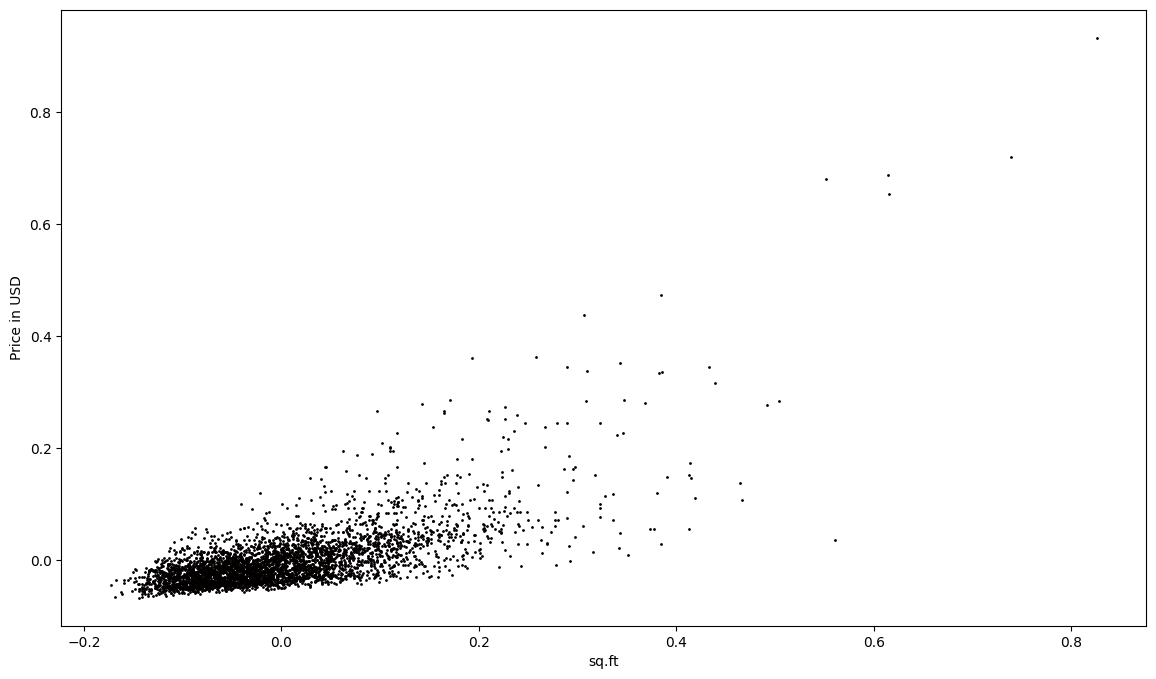

In [20]:
plt.plot(X_train, y_train, 'ro', ms=1, mec='k')
plt.ylabel('Price in USD')
plt.xlabel('sq.ft')
plt.show()

## Bias Trick

Recall that the predications of our linear model are of the form:

$$
\hat{y} = h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

We will add columns of ones as the zeroth column of the features (and we do this for both the training and validation sets).

In [21]:
bias_X_train = np.ones((len(X_train), 1))
X_train = np.append(bias_X_train, X_train, axis=1)

bias_X_val = np.ones((len(X_val), 1))
X_val = np.append(bias_X_val, X_val, axis=1)

## Part 2: Single Variable Linear Regression
Simple linear regression is a linear regression model with a single explanatory varaible and a single target value. 

$$
\hat{y} = h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

## Gradient Descent 

Our task is to find the best possible linear line that explains all the points in our dataset. We start by guessing initial values for the linear regression parameters $\theta$ and updating the values using gradient descent. 

The objective of linear regression is to minimize the cost function $J$:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{n}(h_\theta(x^{(i)})-y^{(i)})^2
$$

where the hypothesis (model) $h_\theta(x)$ is given by a **linear** model:

$$
h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

$\theta_j$ are parameters of our model. and by changing those values accordingly we will be able to lower the cost function $J(\theta)$. One way to accomplish this is to use gradient descent:

$$
\theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}
$$

In linear regresion, we know that with each step of gradient descent, the parameters $\theta_j$ get closer to the optimal values that will achieve the lowest cost $J(\theta)$.

In [23]:
def compute_cost(X, y, theta):
    """
    Computes the average squared difference between an observation's actual and
    predicted values for linear regression.  

    Input:
    - X: inputs  (n features over m instances).
    - y: true labels (1 value over m instances).
    - theta: the parameters (weights) of the model being learned.

    Returns a single value:
    - J: the cost associated with the current set of parameters (single number).
    """
    
    J = 0  # Use J for the cost.
    m = len(y)
    
    if type(theta) != np.matrix: # Converting 'theta' into matrix form
        theta = np.asmatrix(theta).T
        
    J = np.sum(np.square((X * theta) - y) / (2 * m))
    return J


In [25]:
theta = np.array([-1, 2])
J = compute_cost(X_train, y_train, theta)
J

0.5110382451954534

In [26]:
def gradient_descent(X, y, theta, alpha, num_iters):
    """
    Learn the parameters of the model using gradient descent using 
    the training set. Gradient descent is an optimization algorithm 
    used to minimize some (loss) function by iteratively moving in 
    the direction of steepest descent as defined by the negative of 
    the gradient. We use gradient descent to update the parameters
    (weights) of our model.

    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).
    - theta: The parameters (weights) of the model being learned.
    - alpha: The learning rate of your model.
    - num_iters: The number of updates performed.

    Returns two values:
    - theta: The learned parameters of your model.
    - J_history: the loss value for every iteration.
    """
    
    J_history = [] 
    theta = theta.copy() # avoiding changing the original thetas
    m = len(y)
    
    if type(theta) != np.matrix: # Converting 'theta' into matrix form
        theta = np.asmatrix(theta).T 
        
    for iteration in range(0, num_iters):
        # theta = theta - (alpha / m) * (X.T.dot(X.dot(theta) - y))
        theta = theta - (alpha / m) * (X.T * ((X * theta) - y))
        J_history.append(compute_cost(X, y, theta))

    return theta, J_history

In [27]:
theta = np.random.random(size=2)
iterations = 40000
alpha = 0.1
theta, J_history = gradient_descent(X_train ,y_train, theta, alpha, iterations)

We can evaluate the learning process by monitoring the loss as training progress. In the following graph, we visualize the loss as a function of the iterations. This is possible since we are saving the loss value at every iteration in the `J_history` array. This visualization might help us find problems with the code. Notice that since the network converges quickly, we are using logarithmic scale for the number of iterations. 

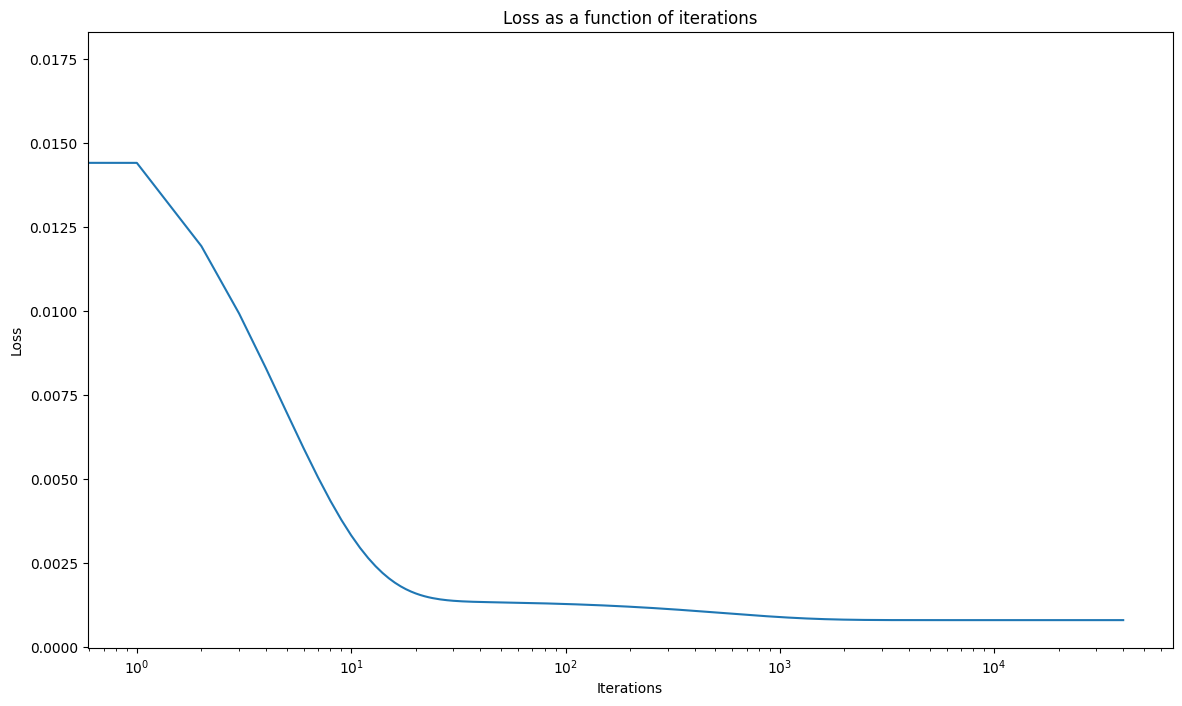

In [28]:
plt.plot(np.arange(iterations), J_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations')
plt.show()

 Pseudo-inverse function `pinv`. Repressent a closed formula for computing the optimal values of the parameters (Using linear algebra only).

In [29]:
def pinv(X, y):
    """
    Calculate the optimal values of the parameters using the pseudoinverse
    approach.

    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).

    Returns two values:
    - theta: The optimal parameters of your model.

    Note that we do not use np.linalg.pinv since we are implementing from scratch.
    """
    
    pinv_theta = []
    X_pinv = np.linalg.inv(X.T * X) * X.T
    pinv_theta = X_pinv * y

    return pinv_theta

In [30]:
theta_pinv = pinv(X_train ,y_train)
J_pinv = compute_cost(X_train, y_train, theta_pinv)

We can add the loss value for the theta calculated using the psuedo-inverse to our graph. This is another sanity check as the loss of our model should converge to the psuedo-inverse loss.

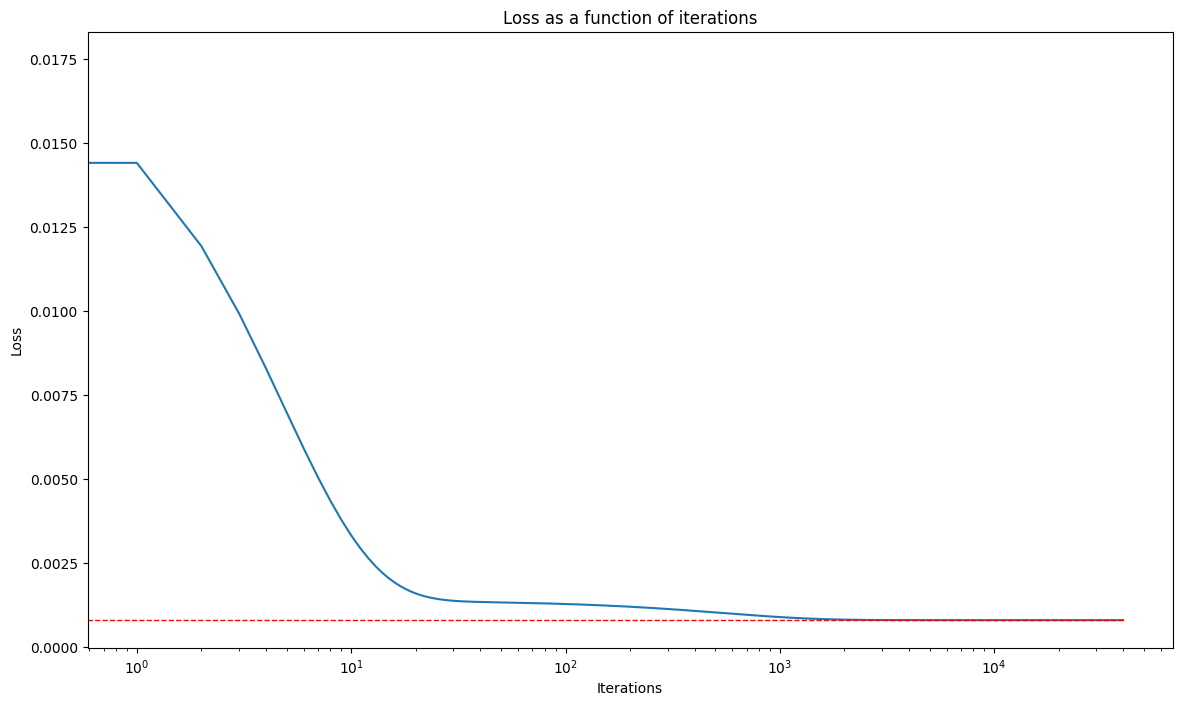

In [31]:
plt.plot(np.arange(iterations), J_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations')
plt.hlines(y = J_pinv, xmin = 0, xmax = len(J_history), color='r',
           linewidth = 1, linestyle = 'dashed')
plt.show()

We can use a better approach for the implementation of `gradient_descent`. Instead of performing 40,000 iterations, we wish to stop when the improvement of the loss value is smaller than `1e-8` from one iteration to the next.

In [32]:
def efficient_gradient_descent(X, y, theta, alpha, num_iters):
    """
    Learn the parameters of the model using the *training set*, but stop 
    the learning process once the improvement of the loss value is smaller 
    than 1e-8. This is a more efficient way of learning the parameters of 
    the model.

    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).
    - theta: The parameters (weights) of the model being learned.
    - alpha: The learning rate of your model.
    - num_iters: The number of updates performed.

    Returns two values:
    - theta: The learned parameters of your model.
    - J_history: the loss value for every iteration.
    """
    
    J_history = []
    theta = theta.copy() 
    m = len(y)
    
    if type(theta) != np.matrix: # Converting 'theta' into matrix form
        theta = np.asmatrix(theta).T 
        
    for iteration in range(0, num_iters):
        theta = theta - (alpha / m) * (X.T * ((X * theta) - y))
        current_cost = compute_cost(X, y, theta)
                
        if iteration > 0 and J_history[iteration - 1] - current_cost < 10**(-8):
            break
            
        J_history.append(current_cost)

    return theta, J_history

The learning rate is another factor that determines the performance of our model in terms of speed and accuracy.

In [33]:
def find_best_alpha(X_train, y_train, X_val, y_val, iterations):
    """
    Iterate over provided values of alpha and train a model using the 
    *training* dataset. maintain a python dictionary with alpha as the 
    key and the loss on the *validation* set as the value.

    Input:
    - X_train, y_train, X_val, y_val: the training and validation data
    - iterations: maximum number of iterations

    Returns:
    - alpha_dict: A python dictionary - {key (alpha) : value (validation loss)}
    """
    np.random.seed(42)
    
    alphas = [0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 2, 3]
    alpha_dict = {}
    J_history = []
    
    for alpha in alphas:
        np.random.seed(42)
        theta = np.random.random(size=2)
        theta, J_history = efficient_gradient_descent(X_train, y_train, theta, alpha, iterations)
        alpha_dict[alpha] = compute_cost(X_val, y_val, theta)
        
    return alpha_dict

In [35]:
best_alpha = None

alpha_dict = find_best_alpha(X_train, y_train, X_val, y_val, 40000)
best_alpha = min(alpha_dict, key=lambda i: alpha_dict[i]) 

From the best three alpha values we just calculated we provide **one** graph with three lines indicating the training loss as a function of iterations (we use 10,000 iterations).

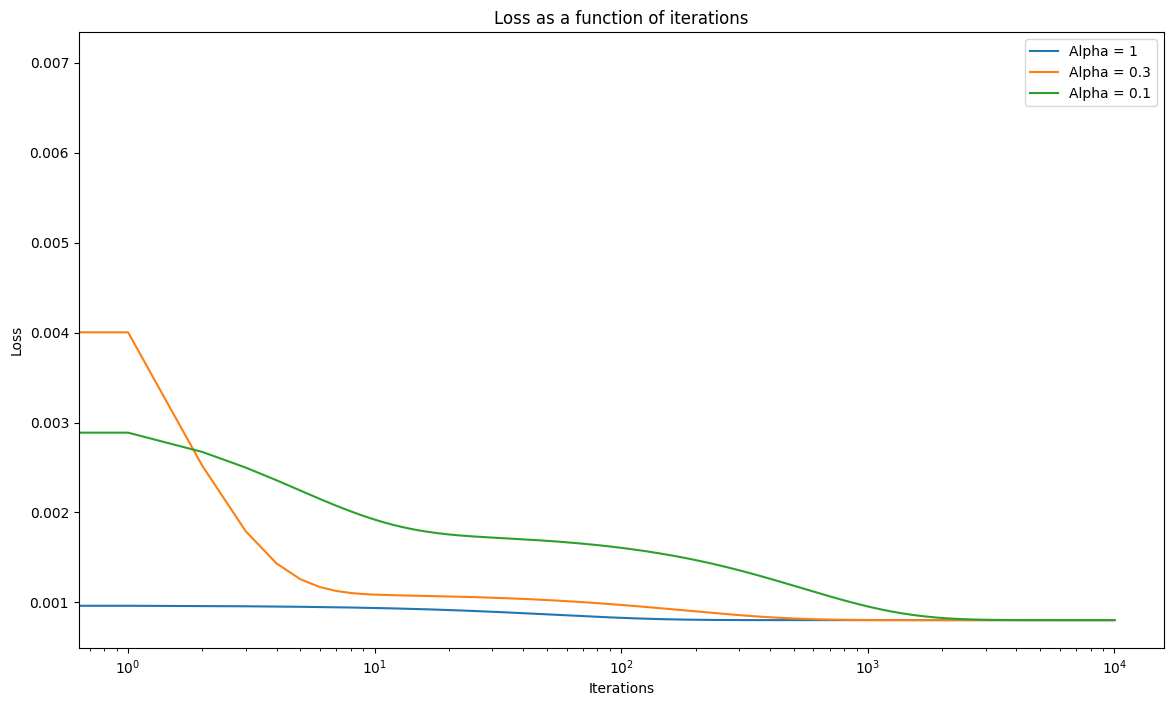

In [36]:
mock_alpha_dict = alpha_dict.copy()
iterations = 10000

for _ in range(3):
    best_alpha = min(mock_alpha_dict, key=lambda i: mock_alpha_dict[i])
    del mock_alpha_dict[best_alpha]
    theta = np.random.random(size=2)
    J_history = []
    theta, J_history = gradient_descent(X_train, y_train, theta, best_alpha, iterations)
    plt.plot(np.arange(iterations), J_history, label='Alpha = {}'.format(best_alpha))

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations')
plt.xscale('log')
plt.legend()
plt.show()

This is yet another sanity check. This function plots the regression lines of our model and the model based on the pseudoinverse calculation. Both models should exhibit the same trend through the data. 

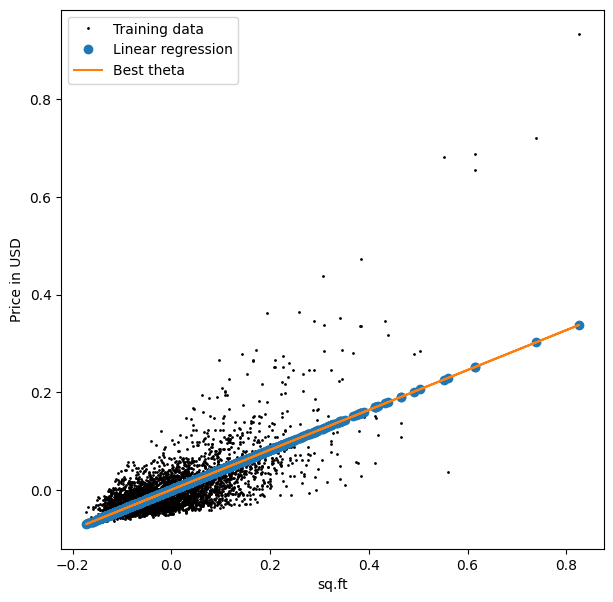

In [37]:
plt.figure(figsize=(7, 7))
plt.plot(X_train[:,1], y_train, 'ro', ms=1, mec='k')
plt.ylabel('Price in USD')
plt.xlabel('sq.ft')
plt.plot(X_train[:, 1], np.dot(X_train, theta), 'o')
plt.plot(X_train[:, 1], np.dot(X_train, theta_pinv), '-')

plt.legend(['Training data', 'Linear regression', 'Best theta']);

## Part 2: Multivariate Linear Regression
In most cases, we deal with databases that have more than one feature. It can be as little as two features and up to thousands of features. In those cases, we use a multiple linear regression model. The regression equation is almost the same as the simple linear regression equation:

$$
\hat{y} = h_\theta(\vec{x}) = \theta^T \vec{x} = \theta_0 + \theta_1 x_1 + ... + \theta_n x_n
$$

In [61]:
# Read comma separated data
df = pd.read_csv('./data/housing_prices.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


## Preprocessing

Like in the single variable case, we need to create a numpy array from the dataframe. Before doing so, we should notice that some of the features are clearly irrelevant.

In [62]:
X = df.drop(columns=['price', 'id', 'date']).values
y = df['price'].values

# preprocessing
X, y = preprocess(X, y)

In [63]:
# training and validation split
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
X_train, X_val = X[idx_train,:], X[idx_val,:]
y_train, y_val = y[idx_train], y[idx_val]

Using 3D visualization, we can still observe trends in the data.

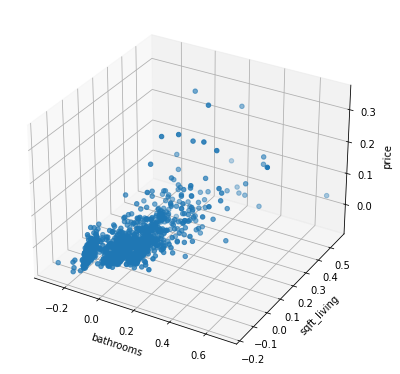

In [ ]:
%matplotlib inline
import mpl_toolkits.mplot3d.axes3d as p3
fig = plt.figure(figsize=(5,5))
ax = p3.Axes3D(fig)
xx = X_train[:, 1][:1000]
yy = X_train[:, 2][:1000]
zz = y_train[:1000]
ax.scatter(xx, yy, zz, marker='o')
ax.set_xlabel('bathrooms')
ax.set_ylabel('sqft_living')
ax.set_zlabel('price')
plt.show()

Using again the bias trick

In [65]:
bias_X_train = np.ones((len(X_train), 1))
X_train = np.append(bias_X_train, X_train, axis=1)

bias_X_val = np.ones((len(X_val), 1))
X_val = np.append(bias_X_val, X_val, axis=1)

In [66]:
shape = X_train.shape[1]
theta = np.ones(shape)
J = compute_cost(X_train, y_train, theta)

In [67]:
shape = X_train.shape[1]
theta = np.random.random(shape)
iterations = 40000
theta, J_history = gradient_descent(X_train ,y_train, theta, best_alpha, iterations)

In [68]:
theta_pinv = pinv(X_train ,y_train)
J_pinv = compute_cost(X_train, y_train, theta_pinv)

We can use visualization to make sure the code works well. Notice we use logarithmic scale for the number of iterations, since gradient descent converges after ~500 iterations.

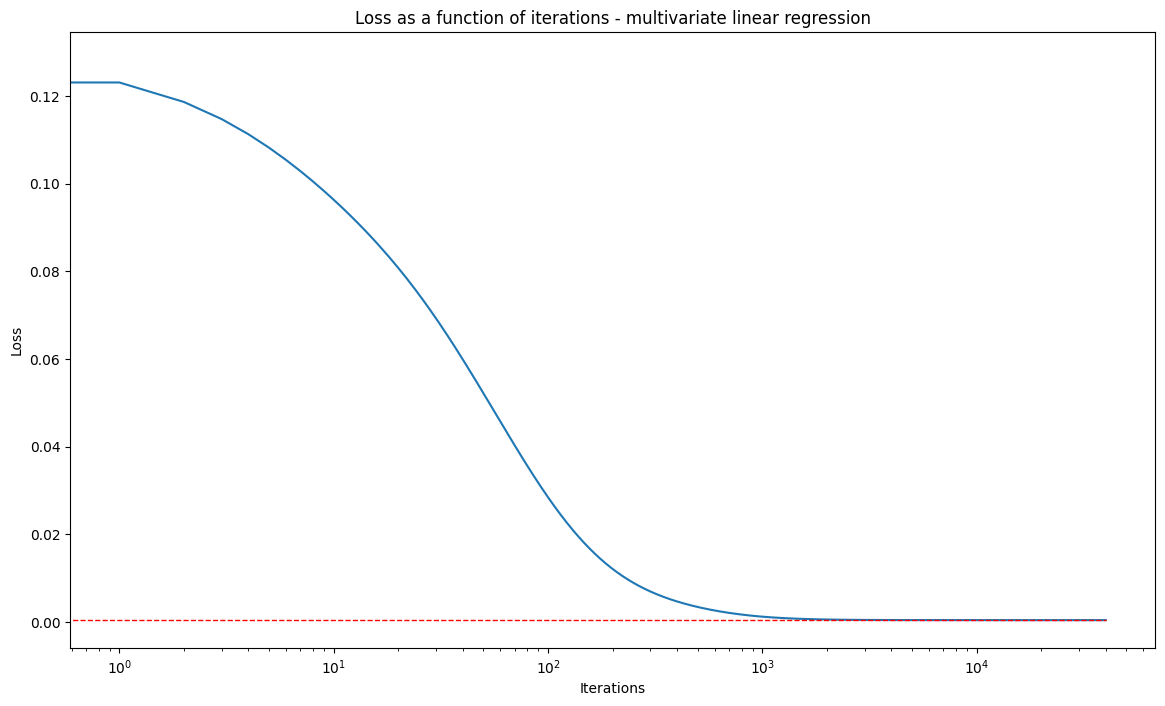

In [69]:
plt.plot(np.arange(iterations), J_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations - multivariate linear regression')
plt.hlines(y = J_pinv, xmin = 0, xmax = len(J_history), color='r',
           linewidth = 1, linestyle = 'dashed')
plt.show()

## Part 3: Find best features for regression

Adding additional features to our regression model makes it more complicated but does not necessarily improves performance.
We use forward and backward selection to find 4 features that best minimizes the loss. First, we will reload the dataset as a dataframe in order to access the feature names.

In [70]:
columns_to_drop = ['price', 'id', 'date']
all_features = df.drop(columns=columns_to_drop)
all_features.head(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


### Forward Feature Selection

We train the model using a single feature at a time, and choose the best feature using the validation dataset. Next, we check which feature performs best when added to the feature we previously chose. Repeat this process until we reach 4 features + bias.

In [71]:
def forward_selection():
    """
    Train the model using the training set using a single feature. 
    Choose the best feature according to the validation set. 
    Check which feature performs best when added to the feature
    we previously chose.

    Returns:
    - The names of the best features using forward selection.
    """
    np.random.seed(42)
    best_features = None
    best_features = []
    
    # init data
    y = df['price'].values
    X = np.asmatrix(all_features)
    X, y = preprocess(X, y)
    
    # splitting data to matrices - train and validation
    indices = np.random.permutation(X.shape[0])
    idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
    X_train, X_val = X[idx_train,:], X[idx_val,:]
    y_train, y_val = y[idx_train], y[idx_val]
    
    # bias trick 
    bias_X_train = np.ones((len(X_train), 1))
    X_train = np.append(bias_X_train, X_train, axis=1)
    bias_X_val = np.ones((len(X_val), 1))
    X_val = np.append(bias_X_val, X_val, axis=1)
    
    # define varaiables
    current_itr = 1
    iterations = 40000
    
    # adding the ones column
    temp_features_train = X_train[:,0]
    temp_features_val = X_val[:,0]

    while current_itr < 5:

        feature_to_add_index = 0
        # max python value
        min_J = float('inf')
        
        # find best feature
        for i in range (1, X_train.shape[1]):
            
            # check if the i'th feature has already been selected
            if all_features.columns[i-1] in best_features:
                continue
            
            # adding the i'th feature
            temp_features_train = np.append(temp_features_train, X_train[:,i], axis=1)
            temp_features_val = np.append(temp_features_val, X_val[:,i], axis=1)
            
            # find theta                             
            np.random.seed(42)
            theta = np.random.random(temp_features_train.shape[1])
            theta, J_history = efficient_gradient_descent(temp_features_train, y_train, theta, best_alpha, iterations)

            # compute J after adding the i'th feature
            current_J = compute_cost(temp_features_val, y_val, theta)

            # delete the last added feature featur
            temp_features_train = np.delete(temp_features_train, current_itr, axis=1)
            temp_features_val = np.delete(temp_features_val, current_itr, axis=1)
            
            
            # check if we've found better feature
            if min_J > current_J:
                min_J = current_J
                feature_to_add_index = i
        
        # adding the best feature found in this round
        temp_features_train = np.append(temp_features_train, X_train[:,feature_to_add_index], axis=1)
        temp_features_val = np.append(temp_features_val, X_val[:,feature_to_add_index], axis=1)

        # adding the feature name to the returning list                                 
        best_features.append(all_features.columns[feature_to_add_index-1])
                                          
        current_itr = current_itr+1

    return best_features


### Backward Feature Selection
We train the model with all but one of the features at a time and remove the worst feature (the feature that its absence yields the best loss value using the validation dataset). Next, we remove an additional feature along with the feature we previously removed. Repeat this process until we reach 4 features + bias.

In [72]:
def backward_selection():
    """
    Train the model using the training set using all but one of the 
    features at a time. Remove the worst feature according to the 
    validation set. Next, remove an additional feature along with the 
    feature we previously removed. Repeat this process until we 
    reach 4 features and the bias.
    
    Returns:
    - The names of the best features using backward selection.
    """
    np.random.seed(42)
    best_features = None
    best_features = []
    indexes_to_remove = []
    
    # init data
    y = df['price'].values
    X = np.asmatrix(all_features)
    X, y = preprocess(X, y)
    num_of_features = X.shape[1]
    
    # splitting data to matrices - train and validation
    indices = np.random.permutation(X.shape[0])
    idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
    X_train, X_val = X[idx_train,:], X[idx_val,:]
    y_train, y_val = y[idx_train], y[idx_val]
    
    # bias trick 
    bias_X_train = np.ones((len(X_train), 1))
    X_train = np.append(bias_X_train, X_train, axis=1)
    bias_X_val = np.ones((len(X_val), 1))
    X_val = np.append(bias_X_val, X_val, axis=1)
    
    # define varaiables
    features_deleted_num =0
    iterations = 40000

    while features_deleted_num < num_of_features - 4:
        feature_to_delete_index = 0
        # max python value
        min_J = float('inf')
        
        # find worst feature
        for i in range (1, X_train.shape[1]):
            # check if the i'th feature has already been selected
            if i in indexes_to_remove:
                continue
            
            # find theta                             
            shape = X_train.shape[1]- (len(indexes_to_remove) +1)
            theta = np.random.random(shape)
            temp_list = indexes_to_remove.copy()
            temp_list.append(i)
            theta, J_history = efficient_gradient_descent(np.delete(X_train, np.array(temp_list), axis=1),
                                                          y_train, theta, best_alpha, iterations)

            # compute J after removing the i'th feature
            current_J = compute_cost(np.delete(X_val, np.array(temp_list), axis=1), y_val, theta)

            # check if we've found worst feature
            if min_J > current_J:
                min_J = current_J
                feature_to_delete_index = i
                
        # adding the feature index to indexes_to_remove list
        indexes_to_remove.append(feature_to_delete_index)                                  
        features_deleted_num = features_deleted_num +1
    
    # making a list of all best features found
    for i in range (num_of_features):
        if (i+1) not in indexes_to_remove:
            best_features.append(all_features.columns[i])
    
    return best_features

## Part 4: Adaptive Learning Rate

So far, we kept the learning rate alpha constant during training. However, changing alpha during training might improve convergence in terms of the global minimum found and running time.

Time based decay: this method reduces the learning rate every iteration according to the following formula:

$$\alpha = \frac{\alpha_0}{1 + D \cdot t}$$

Where $\alpha_0$ is the original learning rate, $D$ is a decay factor and $t$ is the current iteration.

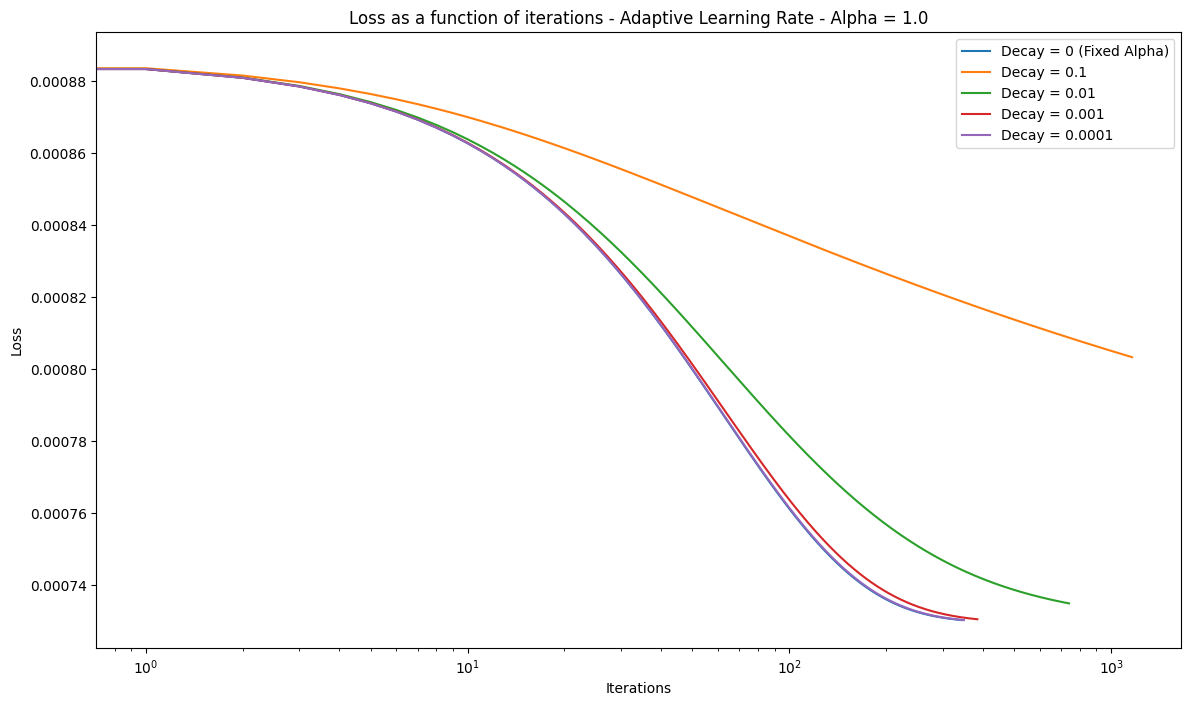

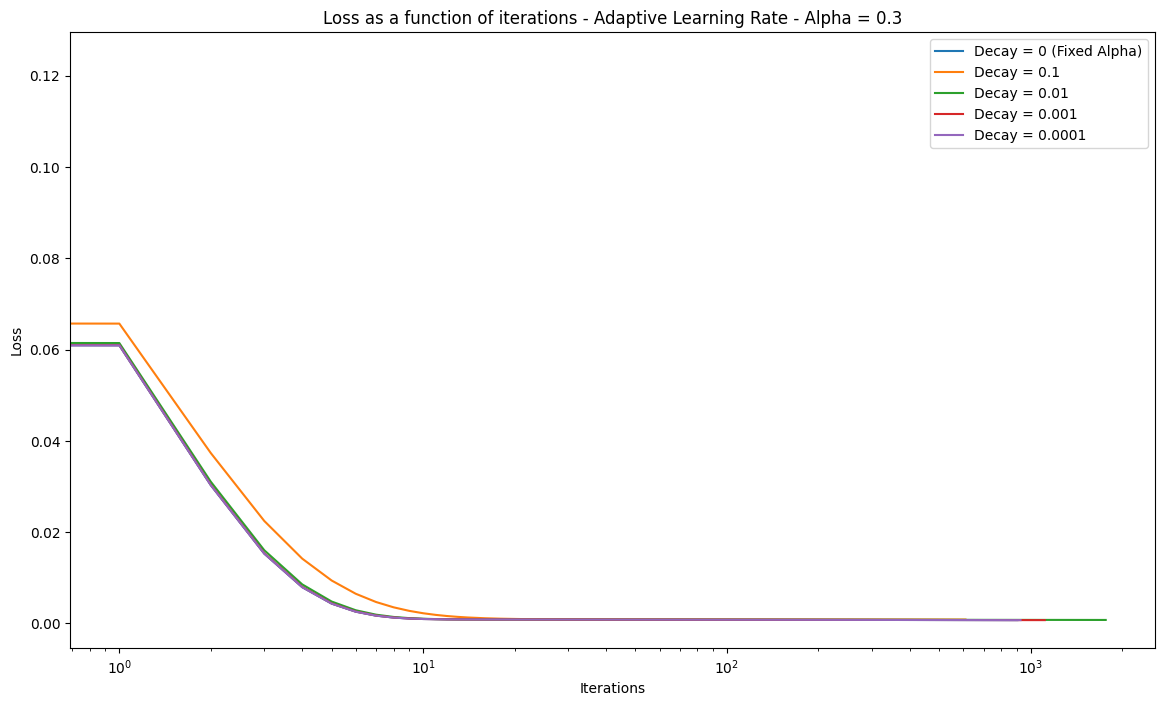

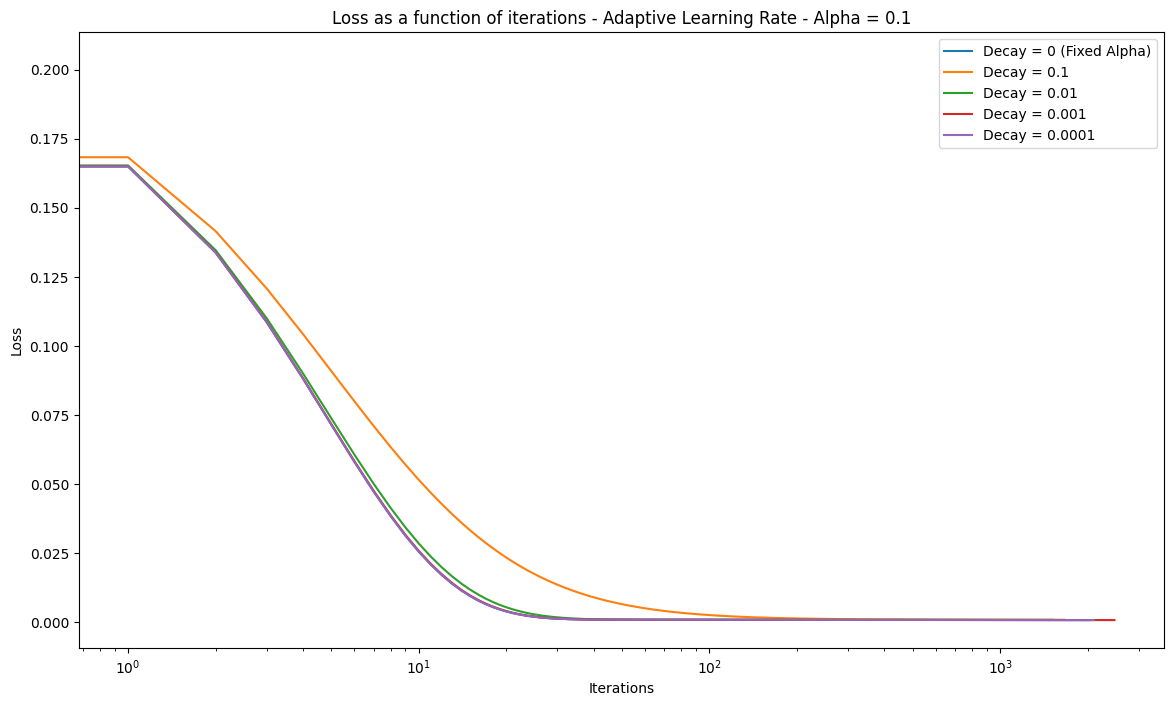

In [74]:
# learning rate decay
def decay_learning_rate(initial_lrate, decay, iteration):
    return initial_lrate * (1.0 / (1.0 + decay * iteration))

# Adaptive learning rate gradient descent - based on gradient_descent function
def alrate_gradient_descent(X, y, theta, alpha, num_iters, decay):   
    J_history = []
    initial_lrate = alpha
    m = len(y)
    
    # Converting 'theta' into matrix form
    if type(theta) != np.matrix: 
        theta = np.asmatrix(theta).T 
        
    for iteration in range(0, num_iters):
        # apply adaptive learning rate technique
        alpha = decay_learning_rate(initial_lrate, decay, iteration)
        theta = theta - (alpha / m) * (X.T * ((X * theta) - y))
        current_cost = compute_cost(X, y, theta)
        
        if iteration > 0 and J_history[iteration - 1] - current_cost < 10**(-8):
            return J_history
        
        J_history.append(current_cost)

alphas = [1.0, 0.3, 0.1]
decays = [0.1, 0.01, 0.001, 0.0001]
num_iters = 40000

# init data - for this task we test only the sqft_living feature
X = df['sqft_living'].values
y = df['price'].values
X, y = preprocess(X, y)

bias_X = np.ones((len(X), 1))
X = np.append(bias_X, X, axis=1)

theta = np.random.random(X.shape[1])

# splitting data to matrices - train and validation
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
X_train, X_val = X[idx_train,:], X[idx_val,:]
y_train, y_val = y[idx_train], y[idx_val]
    
for alpha in alphas:
    fixed_J_history = alrate_gradient_descent(X_val, y_val, theta, alpha, num_iters, 0)
    J_history_0 = alrate_gradient_descent(X_val, y_val, theta, alpha, num_iters, decays[0])
    J_history_1 = alrate_gradient_descent(X_val, y_val, theta, alpha, num_iters, decays[1])
    J_history_2 = alrate_gradient_descent(X_val, y_val, theta, alpha, num_iters, decays[2])
    J_history_3 = alrate_gradient_descent(X_val, y_val, theta, alpha, num_iters, decays[3])
    
    plt.plot(np.arange(len(fixed_J_history)), fixed_J_history, label='Decay = 0 (Fixed Alpha)')
    plt.plot(np.arange(len(J_history_0)), J_history_0, label='Decay = {}'.format(decays[0]))
    plt.plot(np.arange(len(J_history_1)), J_history_1, label='Decay = {}'.format(decays[1]))
    plt.plot(np.arange(len(J_history_2)), J_history_2, label='Decay = {}'.format(decays[2]))
    plt.plot(np.arange(len(J_history_3)), J_history_3, label='Decay = {}'.format(decays[3]))
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Loss as a function of iterations - Adaptive Learning Rate - Alpha = {}'.format(alpha))
    plt.xscale('log')
    plt.legend()
    plt.show()
        